<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;">
I tried to make this Kernel simple and easy to understand. In my previous kernels I have only used matplotlib and seaborn for data visualizations but in this kernel I am also including plotly. You can see seaborn graphs here and there too.<br/><br/>

        If you like this notebook, please give it an <span style="color:#F28835;"><b><i>upvote</i></b></span> as it keeps me motivated to create more quality kernels.<br/> I hope you like this kernel.
    </p>
</div>

In [ ]:
# For downloading static plotly graphs
# import sys
# !conda install --yes --prefix {sys.prefix} -c plotly plotly-orca 


import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from bs4 import BeautifulSoup
import requests 
import folium 
from folium import plugins
import datetime
from sklearn.preprocessing import OrdinalEncoder

# Predictions
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression


sns.set_style('whitegrid')
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

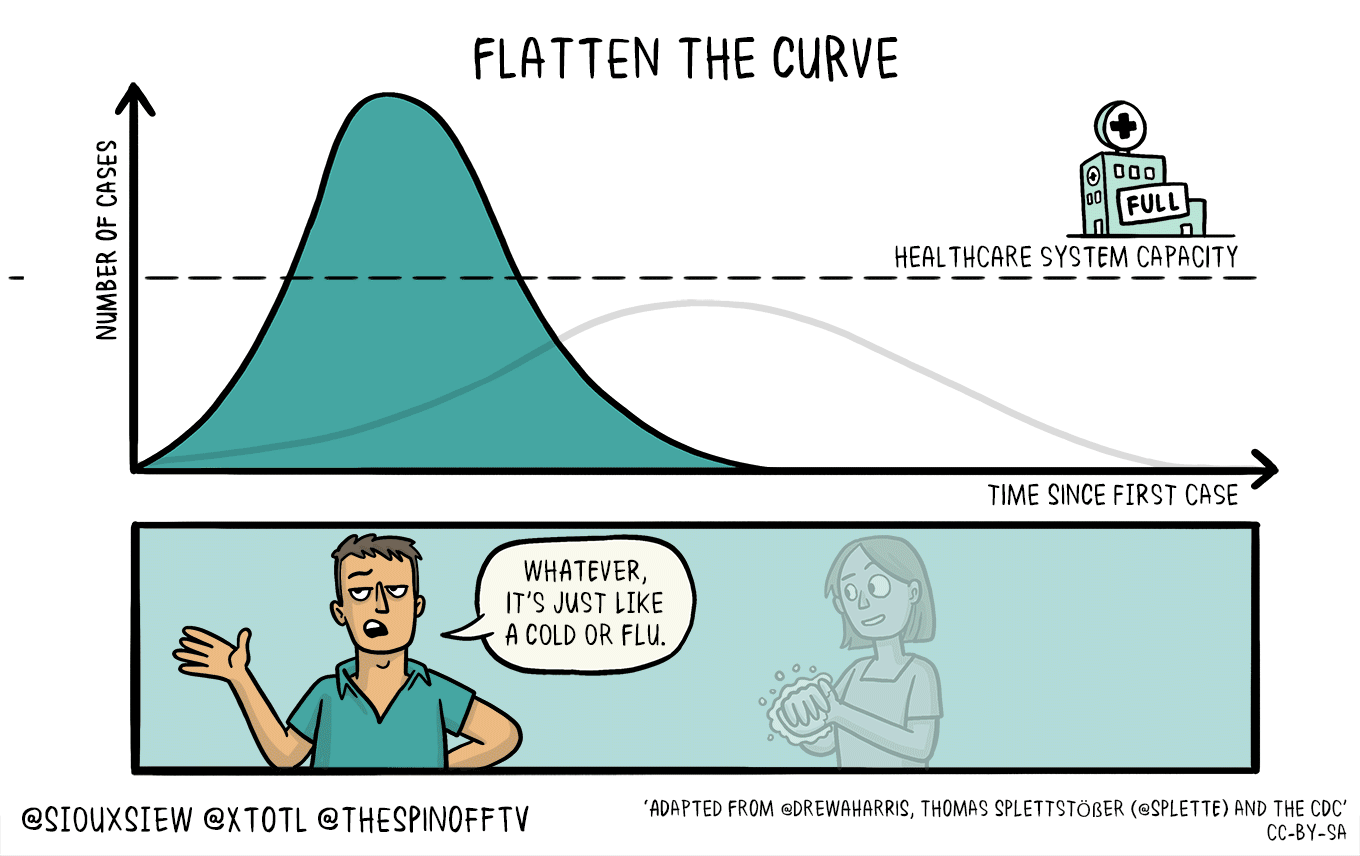

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:4px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>Loading Data</h1>
</div>

In [ ]:
age_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
hospital_data = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
labs_data = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
covid_data = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
world_data = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')

In [ ]:
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli and Daman and Diu":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397] , 
    'State Unassigned':[0,0]
}

In [ ]:
india_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
loc_india = pd.io.json.json_normalize(india_json['data']['statewise'])
loc_india = loc_india.set_index("state")

loc_india["Lat"] = ""
loc_india["Long"] = ""
for index in loc_india.index :
    loc_india.loc[loc_india.index == index,"Lat"] = locations[index][0]
    loc_india.loc[loc_india.index == index,"Long"] = locations[index][1]

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>1. Age Data</h1>
</div>

In [ ]:
# age_data.head(15)

A fancy table:

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(age_data.columns),
                fill_color='lightpink',
                align='left'),
    cells=dict(values=[age_data.Sno, age_data.AgeGroup, age_data.TotalCases, age_data.Percentage],
               fill_color='lightblue',
               align='left'))
])

fig.show()

In [ ]:
age_data.info()

In [ ]:
# plt.subplots(figsize=(10, 7))
# ax = sns.barplot(age_data['AgeGroup'], age_data['TotalCases'], palette='spring')
# ax.set(xlabel='AgeGroup', ylabel='Total Cases')

In [ ]:
figure = px.bar(age_data, x=age_data['AgeGroup'], y=age_data['TotalCases'], color='AgeGroup')
figure.update_layout(plot_bgcolor='rgb(275, 275, 275)',
                     showlegend=False)
# figure.layout.template = 'plotly_dark'

figure.data[2].marker.line.width = 3
figure.data[2].marker.line.color = "black"

figure.show()

In [ ]:
percent = age_data['Percentage']

In [ ]:
percent

In [ ]:
for i in range(len(percent)):
    percent[i] = percent[i][:-1]

In [ ]:
percent

In [ ]:
percent = percent.astype(float)

In [ ]:
percent

In [ ]:
percent = percent.astype(int)

In [ ]:
percent

In [ ]:
age_data['Percentage'] = percent

In [ ]:
age_data.head(3)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Pie(values=age_data['Percentage'], labels=age_data['AgeGroup'], hole=.3, pull=[0, 0, 0.1, 0, 0]))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=700)

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"

fig.show()

In [ ]:
age_data.info()

Alright, now we only have one categorical value. Lets take care of it quickly.

In [ ]:
age_data['AgeGroup']

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=age_data['AgeGroup'],y=age_data['TotalCases'], 
                         line_shape='spline',fill='tonexty')) 

fig.update_layout(title="Age wise Confirmed Cases in India",yaxis_title="Total Number of cases",xaxis_title="Age Group")

fig.update_layout(plot_bgcolor='rgb(275, 275, 275)',height=600)

fig.show()

In [ ]:
age_group = age_data['AgeGroup']

Here:
* 0-9 means 1
* 10-19 means 2
* 20-29 means 3
* 30-39 means 4

and so on...

In [ ]:
k = 1
for i in range(len(age_group)):
    age_group[i] = k
    k += 1

In [ ]:
age_group

In [ ]:
age_data['AgeGroup'] = age_group.astype(int)

In [ ]:
age_data.info()

In [ ]:
plt.subplots(figsize=(18,7))
sns.pointplot(x=age_data['AgeGroup'], y=age_data['Percentage'], color='#EC2566')

In [ ]:
my_pic = px.scatter(age_data, x='AgeGroup', y='Percentage', color='AgeGroup', size='Percentage')
my_pic

In [ ]:
# my_pic.write_image('hello.png')

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           background-color:#5642C5;
           border-radius:5px;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>2. Hospital Data</h1>
</div>

In [ ]:
hospital_data.head(3)

> Note: HMIS - Health Management Information System

Let's see what we are working with here with our three solid pillars: <code>df.columns</code>, <code>df.info()</code>, and <code>df.describe()</code>

In [ ]:
hospital_data.columns

In [ ]:
hospital_data.describe()

In [ ]:
hospital_data.info()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>2.1. Handling Missing Data</h1>
</div>

In [ ]:
hospital_data.isnull().sum()

Alright, our data has only one column which is missing values. We must take care of it before moving forward.

In [ ]:
hospital_data['NumSubDistrictHospitals_HMIS'].describe()

Lets analyze the above output for a second. We see that the standard deviation is huge!! The maximum number is 1255 and the minimum is 1. Filling the missing values with mean won't be a good choice here.

**We take a look at the entire table, it may be that missing value represents that there are no 'SubDistrictHospitals' in that State. This seems more reliable and we will fill all the missing values with 0.**

In [ ]:
hospital_data['NumSubDistrictHospitals_HMIS'] = hospital_data['NumSubDistrictHospitals_HMIS'].fillna(0)

### Something in disguise
Pay attention to the DataTypes above. We see that <code>'NumSubDistrictHospitals_HMIS'</code> is of <code><i>float64</i></code> data type which doesn't seem right. Lets investigate further.

In [ ]:
hospital_data['NumSubDistrictHospitals_HMIS'].head(10)

We must convert this to <code><i>int</i></code>

In [ ]:
hospital_data['NumSubDistrictHospitals_HMIS'] = hospital_data['NumSubDistrictHospitals_HMIS'].astype(int)

In [ ]:
hospital_data['NumSubDistrictHospitals_HMIS'].head()

Alright, we have less problems to worry for as we have taken care of missing data values. **But wait... there is something else** we seeeee

The column 'NumPrimaryHealthCenters_HMIS' is of <code><i>Categorical Data</i></code> type but instead it should be of <code><i>int</i></code> datatype.

In [ ]:
hospital_data['NumPrimaryHealthCenters_HMIS']

Before we simply go and apply the <code>astype(int)</code> magic on this column, **there is an anomaly in this data in the last row**. The last row contains comma in the data. We must update this row.

In [ ]:
hospital_data['NumPrimaryHealthCenters_HMIS'].iloc[36]

In [ ]:
hospital_data['NumPrimaryHealthCenters_HMIS'].iloc[36] = '29899'

In [ ]:
hospital_data['NumPrimaryHealthCenters_HMIS'] = hospital_data['NumPrimaryHealthCenters_HMIS'].astype(int)

In [ ]:
hospital_data['NumPrimaryHealthCenters_HMIS']

In [ ]:
hospital_data.info()

In [ ]:
num_cols = [col for col in hospital_data.columns
           if hospital_data[col].dtype!='object' and col != 'Sno']

In [ ]:
num_cols

In [ ]:
fig = plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    fig.add_subplot(9, 2, i+1)
    sns.barplot(x=hospital_data['State/UT'], y=hospital_data[num_cols[i]], palette='spring')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Lets closely look at some features.

In [ ]:
hospital_data['State/UT'].iloc[36]

### Number of Public Beds in Each State

In [ ]:
# plt.subplots(figsize=(15, 7))
# fig = sns.barplot(x=hospital_data['State/UT'].iloc[:36], 
#                       y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
#                       palette='spring')
# plt.xticks(rotation=90)
# fig

In [ ]:
fig = px.bar(hospital_data, 
             x=hospital_data['State/UT'].iloc[:36], 
             y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
             color=hospital_data['NumPublicBeds_HMIS'].iloc[:36])

fig.update_layout(title={
        'text': "Num of Public Beds in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State/UT",
        yaxis_title="Number of Public Beds",
        plot_bgcolor='white')

In [ ]:
hospital_data[['State/UT', 'NumPublicBeds_HMIS']].groupby(['State/UT']).mean().sort_values(by='NumPublicBeds_HMIS', ascending=False)

**From the data above it is quite clear that Tamil Nadu has the most number of public beds in India followed by Maharashtra.**

### Total Public Health Facilities in Each State

In [ ]:
fig = px.bar(hospital_data, 
             x=hospital_data['State/UT'].iloc[:36], 
             y=hospital_data['TotalPublicHealthFacilities_HMIS'].iloc[:36], 
             color=hospital_data['TotalPublicHealthFacilities_HMIS'].iloc[:36])

fig.update_layout(title={
        'text': "Num of Public Health Facilities in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State/UT",
        yaxis_title="Number of Public Health Facilities",
        plot_bgcolor='white')

In [ ]:
hs_public = hospital_data[['State/UT', 'TotalPublicHealthFacilities_HMIS']].groupby(['State/UT']).mean().sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)
hs_public

**From the data above it is quite clear that Uttar Pradesh has the most number of public health facilities in India followed by Maharashtra.**

A really cool looking 3d Graph... because why not?

In [ ]:
fig = px.scatter_3d(hospital_data, x=hospital_data['State/UT'], 
                    y=hospital_data['NumPublicBeds_HMIS'], 
                    z=hospital_data['NumPrimaryHealthCenters_HMIS'],
                    color='State/UT')
fig.update_layout(scene_zaxis_type="log", showlegend=False, height=600)
fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>3. Testing Labs</h1>
</div>

In [ ]:
labs_data.head(3)

In [ ]:
labs_data.info()

From this data, we can find out the total number of labs present in each state.

It is clear from above output that we do not have to deal with missing values in this dataset. So lets keep moving forward

### Number of Labs in Each State
First, lets find out the frequency of state in this dataset and so we will know the total number of labs in that particular state.

In [ ]:
labs_data['state'].value_counts()


In [ ]:
# Uncomment for side-by-side view (plotly subplots)

# fig = make_subplots(rows=1, cols=2,
#                specs=[[{"type": "pie"},{"type": "bar"}]])
# fig.add_trace(
#     go.Pie(labels=labs_data['state'].sort_values().unique(), values=labs_data['state'].value_counts().sort_index()),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Bar(x=labs_data['state'].sort_values().unique(), y=labs_data['state'].value_counts().sort_index()),
#     row=1, col=2
# )
# fig.update_layout(height=800, width=1400, title_text="Number of Labs in Each State")
# fig.show()

In [ ]:
fig1 = px.bar(labs_data,x=labs_data['state'].sort_values().unique(), 
              y=labs_data['state'].value_counts().sort_index(),
              text=labs_data['state'].value_counts().sort_index(),
              color=labs_data['state'].sort_values().unique())
fig1.update_layout(title={
        'text': "Number of Labs in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="",
        yaxis_title="Number of Labs",
        showlegend=False,
        plot_bgcolor='white'
        )
fig1.data[19].marker.line.width = 3
fig1.data[19].marker.line.color = "black"

# -----------------------------------------------------------

fig2 = px.pie(labs_data, 
              'state',
              hole=.5
             )
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(title={
                        'text': "Percentage of Labs in Each State of India",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                         showlegend=False,
                         height=600
                        )

fig2.data[0].marker.line.width = 2
fig2.data[0].marker.line.color = "black"


fig1.show()
fig2.show()

### Type of Labs
Second, we will find out how many types of labs are present in each state.

In [ ]:
labs_data['type'].unique()

There are a total of 3 types of laboratories:
1. Government Laboratory
2. Collection Site
3. Private Laboratory

In [ ]:
lab_type = labs_data[['type', 'state']].groupby(['type', 'state']).sum()
display(lab_type)

In [ ]:
# state_list = list(labs_data['state'].unique())
# lab_type = list(labs_data['type'].unique())

Using hierarchical chart like **Sunburst** is the best way to describe the relationship between 'Type of Labs' and 'State'.

You can click on the 'lab type' in the chart below to expand or contract it.

In [ ]:
fig = px.sunburst(labs_data, path=['type', 'state'], height=700)
fig.update_layout(title={
        'text': "Classification based on Type of Labs",
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         showlegend=False         
                  )
fig.show()

> This Sunburst Chart gives a clear picture of different tyepes of labs present in all the states.

From above Sunburst Chart and table we can find out the presence of three labs in different states:
* Collection Site - 3 states
* Government Laboratory - 182 states
* Private Laboratory - 82 states

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>4. Covid Data</h1>
</div>

In [ ]:
covid_data.head(3)

In [ ]:
covid_data.info()

Converting 'Date' from object to Datetime datatype.

In [ ]:
date_data = covid_data[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_data['Date'] = date_data['Date'].apply(pd.to_datetime, dayfirst=True)

date_data = date_data.groupby(['Date']).sum().reset_index()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Confirmed'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Confirmed Cases'))

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Cured'], mode='lines+markers', 
                          marker_color='green', name='Recovered'))

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Deaths'], mode='lines+markers', 
                          marker_color='red', name='Deaths'))
fig.update_layout(title={
                  'text': "Total Confirmed, Recovered and Deaths in India",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650)

fig.show()

I have done State wise analysis in another kernel. It is a quick look at the coronavirus situation in India.

Please take a look:
https://www.kaggle.com/shubhamksingh/covid19-india-quicklook

In [ ]:
state_cases = covid_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

# Creating new columns 'Active', 'Death rate per 100' and 'Cure rate per 100'
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Cured'] + state_cases['Deaths'])
state_cases['Death rate per 100'] = np.round((100*state_cases["Deaths"]/state_cases["Confirmed"]), 2)
state_cases['Cure rate per 100'] = np.round((100*state_cases["Cured"]/state_cases["Confirmed"]), 2)

In [ ]:
state_cases = state_cases.sort_values(by='Confirmed', ascending=False)
state_cases.style.bar(color='#FDD017',subset=["Confirmed"])\
                        .bar(color='red',subset=["Deaths"])\
                        .bar(color='lime',subset=["Cured"])\
                        .bar(color='mediumslateblue', subset=["Active"])\
                        .bar(color='pink', subset=["Death rate per 100"])\
                        .bar(color='lightgreen', subset=["Cure rate per 100"])

In [ ]:
state_cases.to_csv('State_Cases.csv')

In [ ]:
state_cases = state_cases.sort_values(by='Confirmed', ascending=True)

fig = go.Figure(data=[go.Bar(name='Confirmed', x = state_cases['Confirmed'], 
                             y = state_cases['State/UnionTerritory'],
                             orientation='h',marker_color='#5642C5'),
                      go.Bar(name='Cured', x=state_cases['Cured'], 
                             y=state_cases['State/UnionTerritory'],
                             orientation='h', marker_color='#00974E'),
                      go.Bar(name='Deaths', x=state_cases['Deaths'],
                             y=state_cases['State/UnionTerritory'],
                             orientation='h', marker_color='#EC2566')
                     ])

fig.update_layout(plot_bgcolor='white', 
                  barmode='stack', height=900)
fig.show()

In [ ]:
fig = px.scatter(state_cases, y='State/UnionTerritory', x='Death rate per 100', color='State/UnionTerritory', size='Death rate per 100')
fig.update_layout(title={
                  'text': "Death rate per 100 in each state",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  showlegend=False)

In [ ]:
fig = px.scatter(state_cases, y='State/UnionTerritory', x='Cure rate per 100', color='State/UnionTerritory', size='Cure rate per 100')
fig.update_layout(title={
                  'text': "Cure rate per 100 in each state",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  showlegend=False)

In [ ]:
from folium.plugins import HeatMap, HeatMapWithTime

covid_area = folium.Map(location=[20.5937, 78.9629], zoom_start=15,max_zoom=4,min_zoom=3,
                          tiles='CartoDB positron',height = 500,width = '70%')

HeatMap(data=loc_india[['Lat','Long','confirmed']].groupby(['Lat','Long']).sum().reset_index().values.tolist(),
        radius=18, max_zoom=14).add_to(covid_area)

covid_area

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>5. World Data</h1>
</div>

In [ ]:
world_data.head()

In [ ]:
world_data['Date'] = world_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [ ]:
world_data['Date'] = world_data['Date'].dt.strftime('%Y/%m/%d')

In [ ]:
country_cases = world_data.groupby('Country/Region')['Confirmed','Deaths','Recovered', 'Active'].max().reset_index()
country_cases = country_cases.sort_values(by='Confirmed', ascending=False)
country_cases = country_cases.iloc[:40]
country_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues', subset=["Active"])\

In [ ]:
country_cases.to_csv('Country_Cases.csv')

In [ ]:
fig = px.scatter(world_data, 'Confirmed', 'Country/Region', color='Country/Region', size='Confirmed')
fig.update_layout(showlegend=False, plot_bgcolor='white')
fig.show()

In [ ]:
fig = px.scatter_3d(world_data, 'Country/Region', 'Date', 'Confirmed', size='Confirmed', color='Country/Region')
fig.update_layout(showlegend=False,
                  height=800)
fig.show()

In [ ]:
df_country = world_data
anime_graph_data = df_country[(df_country['Country/Region']=='India') | (df_country['Country/Region']=='US') | (df_country['Country/Region']=='Brazil')| (df_country['Country/Region']=='Russia') | (df_country['Country/Region']=='United Kingdom') | (df_country['Country/Region']=='Spain') | (df_country['Country/Region']=='Italy') | (df_country['Country/Region']=='Peru') | (df_country['Country/Region']=='Iran') | (df_country['Country/Region']=='Germany')]


In [ ]:
fig = px.bar(anime_graph_data, x="Country/Region", y="Confirmed",color='Country/Region',animation_frame = 'Date')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title='Top 10 countries Confirmed cases')
fig.update_layout(showlegend=False, height=600, plot_bgcolor='white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>6. Making Predictions (India)</h1>
</div>

We will perform data forecasting using Prophet library. We will predict the coronavirus cases till **December 2020**.

In [ ]:
india_data = world_data[world_data["Country/Region"]=="India"]
india_data.head()

In [ ]:
pred_data = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

pred_data['Date'] = pred_data['Date'].apply(pd.to_datetime, dayfirst=True)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.1. Confirmed Cases in India</h1>
</div>

In [ ]:
pred_confirm = pred_data.loc[:, ['Date', 'Confirmed']]
pred_confirm.tail()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.1. Creating Model</h1>
</div>

Defining our Prophet() model.

In [ ]:
model = Prophet()

In [ ]:
# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_confirm.columns = ['ds', 'y']
model.fit(pred_confirm)

We can get a suitable dataframe that extends into the future a specified number of days using the helper method <code>Prophet.make_future_dataframe</code>. By default it will also include the dates from the history, so we will see the model fit as well.

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.2. Making Predictions</h1>
</div>

In [ ]:
forecast_india_conf = model.predict(future)

forecast_india_conf

In [ ]:
forecast_india_conf[['ds', 'trend']].to_csv('forecast_confirm_india.csv')

In [ ]:
fig = plot_plotly(model, forecast_india_conf)

fig.update_layout(template='plotly_white', title="Confirmed Cases India Prediction")

iplot(fig) 

We can clearly see the prediction of our model that on **'26 December, 2020'** there will be a total of **'~2M (2 million)'** confirmed cases in India if the number of confirmed cases goes on increasing like this.

In [ ]:
fig = model.plot(forecast_india_conf)

In [ ]:
fig = model.plot_components(forecast_india_conf)

In [ ]:
cnfrm = forecast_india_conf.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm.columns = ['Date','Confirm']
cnfrm.tail(15)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.2. Recovered Cases in India</h1>
</div>

In [ ]:
pred_recover = pred_data.loc[:, ['Date', 'Recovered']]

In [ ]:
pred_recover.tail()

In [ ]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_recover.columns = ['ds', 'y']
model.fit(pred_recover)

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

In [ ]:
forecast_india_recover = model.predict(future)

forecast_india_recover

In [ ]:
forecast_india_recover.to_csv('forecast_recovered_india.csv')

In [ ]:
fig = plot_plotly(model, forecast_india_recover)

fig.update_layout(template='plotly_white', title="Total Recovered Cases India Prediction")

iplot(fig) 

In [ ]:
# fig = px.scatter(forecast_india_recover, forecast.ds, forecast.trend)
# fig.show()

In [ ]:
fig = model.plot_components(forecast_india_recover)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.3. Deaths in India</h1>
</div>

In [ ]:
pred_deaths = pred_data.loc[:, ['Date', 'Deaths']]
pred_deaths.tail(3)

In [ ]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_deaths.columns = ['ds', 'y']
model.fit(pred_deaths)

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

In [ ]:
forecast_india_death = model.predict(future)

forecast_india_death

In [ ]:
forecast_india_death.to_csv('forecast_deaths_india.csv')

In [ ]:
fig = plot_plotly(model, forecast_india_death)

fig.update_layout(template='plotly_white', title="Total Deaths in India Prediction")

iplot(fig) 

In [ ]:
fig = model.plot_components(forecast_india_death)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Conclusion (India)</h1>
</div>

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast_india_conf['ds'], 
                         y=forecast_india_conf['trend'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Predicted Confirm'))

fig.add_trace(go.Scatter(x=forecast_india_recover['ds'], 
                         y=forecast_india_recover['trend'], mode='lines+markers', 
                          marker_color='green', name='Predicted Recovered'))

fig.add_trace(go.Scatter(x=forecast_india_death['ds'], 
                         y=forecast_india_death['trend'], mode='lines+markers', 
                          marker_color='red', name='Predicted Deaths'))
fig.update_layout(title={
                  'text': "Predicted Confirmed, Recovered and Deaths in India",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>7. Making Predictions (World)</h1>
</div>

In [ ]:
world_data.head(3)

In [ ]:
world_pred = world_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

display(world_pred.head(3))
display(world_pred.tail(3))

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.1. Confirmed Cases in World</h1>
</div>

In [ ]:
world_pred_conf = world_pred.loc[:, ['Date', 'Confirmed']]
world_pred_conf.tail(3)

In [ ]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_conf.columns = ['ds', 'y']
model.fit(world_pred_conf)

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

In [ ]:
forecast_world_conf = model.predict(future)

forecast_world_conf

In [ ]:
forecast_world_conf[['ds', 'trend']].to_csv('forecast_world_conf.csv')

In [ ]:
fig = plot_plotly(model, forecast_world_conf)

fig.update_layout(template='plotly_white')

iplot(fig) 

In [ ]:
fig = model.plot_components(forecast_world_conf)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.2. Recovered Cases in World</h1>
</div>

In [ ]:
world_pred_recover = world_pred.loc[:, ['Date', 'Recovered']]
world_pred_recover.tail(3)

In [ ]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_recover.columns = ['ds', 'y']
model.fit(world_pred_recover)

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

In [ ]:
forecast_world_recover = model.predict(future)

forecast_world_recover

In [ ]:
fig = plot_plotly(model, forecast_world_recover)

fig.update_layout(template='plotly_white')

iplot(fig) 

In [ ]:
fig = model.plot_components(forecast_world_recover)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.3. Deaths in World</h1>
</div>

In [ ]:
world_pred_death = world_pred.loc[:, ['Date', 'Deaths']]
world_pred_death.tail(3)

In [ ]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_death.columns = ['ds', 'y']
model.fit(world_pred_death)

In [ ]:
future = model.make_future_dataframe(periods=90)
future.tail()

In [ ]:
forecast_world_death = model.predict(future)

forecast_world_death

In [ ]:
fig = plot_plotly(model, forecast_world_death)

fig.update_layout(template='plotly_white')

iplot(fig) 

In [ ]:
fig = model.plot_components(forecast_world_death)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Conclusion (World)</h1>
</div>

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast_world_conf['ds'], 
                         y=forecast_world_conf['trend'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Predicted Confirm'))

fig.add_trace(go.Scatter(x=forecast_world_recover['ds'], 
                         y=forecast_world_recover['trend'], mode='lines+markers', 
                          marker_color='green', name='Predicted Recovered'))

fig.add_trace(go.Scatter(x=forecast_world_death['ds'], 
                         y=forecast_world_death['trend'], mode='lines+markers', 
                          marker_color='red', name='Predicted Deaths'))
fig.update_layout(title={
                  'text': "Predicted Confirmed, Recovered and Deaths in World",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>ARIMA</h1>
</div>

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Confirmed Cases India</h1>
</div>

In [ ]:
pred_data = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

pred_data['Active'] = pred_data['Confirmed'] - (pred_data['Deaths'] + pred_data['Recovered'])

pred_data['Date'] = pred_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [ ]:
pred_data.sample(frac=0.1)

In [ ]:
pred_data.tail()

In [ ]:
india_conf = pred_data[['Date', 'Confirmed']].copy()

In [ ]:
india_conf.info()

In [ ]:
arima = ARIMA(india_conf['Confirmed'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred_ar_conf = list(forecast[0])

In [ ]:
arima.plot_predict(1,200)

In [ ]:
start_date = india_conf['Date'].max()
prediction_dates = []

for i in range(90):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

In [ ]:
arima_conf_pred = pd.DataFrame({'Date':prediction_dates, 'Trend':pred_ar_conf})
arima_conf_pred.to_csv('arima_confirm_pred.csv')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred_ar_conf, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Confirmed'))

fig.add_trace(go.Scatter(y=india_conf['Confirmed'],x=india_conf['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Confirmed'))


fig.update_layout(title={
                  'text': "Actual Confirmed vs Predicted Confirmed in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Recovered Cases India</h1>
</div>

In [ ]:
india_rec = pred_data[['Date', 'Recovered']].copy()

In [ ]:
arima = ARIMA(india_rec['Recovered'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

In [ ]:
arima.plot_predict(1,200)

In [ ]:
start_date = india_rec['Date'].max()
prediction_dates = []

for i in range(90):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='mediumslateblue', name='Predicted Recovered'))

fig.add_trace(go.Scatter(y=india_rec['Recovered'],x=india_rec['Date'], mode='lines+markers', 
                          marker_color='green', name='Actual Recovered'))


fig.update_layout(title={
                  'text': "Actual Recovered vs Predicted Recovered in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Deaths In India</h1>
</div>

In [ ]:
india_deaths = pred_data[['Date', 'Deaths']].copy()

In [ ]:
arima = ARIMA(india_deaths['Deaths'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

In [ ]:
arima.plot_predict(1,200)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Deaths'))

fig.add_trace(go.Scatter(y=india_deaths['Deaths'],x=india_deaths['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Deaths'))


fig.update_layout(title={
                  'text': "Actual Deaths vs Predicted Deaths in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Active In India</h1>
</div>

In [ ]:
india_active = pred_data[['Date', 'Active']].copy()

In [ ]:
arima = ARIMA(india_active['Active'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

In [ ]:
arima.plot_predict(1,200)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Active Cases'))

fig.add_trace(go.Scatter(y=india_active['Active'],x=india_active['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Active Cases'))


fig.update_layout(title={
                  'text': "Actual Active Cases vs Predicted Active Cases in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

# Linear Regression Prediction (India)

In [ ]:
pred_data['day'] = pred_data['Date'].dt.day
pred_data['month'] = pred_data['Date'].dt.month
pred_data['dayofyear'] = pred_data['Date'].dt.dayofyear
pred_data['dayofweek'] = pred_data['Date'].dt.dayofweek
pred_data['weekofyear'] = pred_data['Date'].dt.weekofyear

In [ ]:
pred_data.tail()

In [ ]:
pred_data['Date'].tail()

In [ ]:
my_pred = pred_data.copy()

In [ ]:
my_pred.tail()

In [ ]:
del my_pred['Date']

In [ ]:
my_pred.columns

In [ ]:
train_my_pred = my_pred[['day', 'month',
       'dayofyear', 'dayofweek', 'weekofyear']]
target_conf = my_pred['Confirmed']

In [ ]:
future = future[future['ds'] > '2020-07-18']

future.ds

In [ ]:
future['day'] = future['ds'].dt.day
future['month'] = future['ds'].dt.month
future['dayofyear'] = future['ds'].dt.dayofyear
future['dayofweek'] = future['ds'].dt.dayofweek
future['weekofyear'] = future['ds'].dt.weekofyear

In [ ]:
future.head()

In [ ]:
future_dates =  future['ds']
del future['ds']

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(train_my_pred, target_conf)

In [ ]:
lr_preds = lr.predict(future)

In [ ]:
lr_csv = pd.DataFrame({'Date':future_dates, 'Trend':lr_preds + (target_conf.max() - lr_preds.min())})
lr_csv.to_csv('linear_reg_pred.csv')

In [ ]:
display(target_conf.max())
display(lr_preds.min())
display(target_conf.max() - lr_preds.min())

In [ ]:
fig = px.line(x=future_dates , y=lr_preds + (target_conf.max() - lr_preds.min()), color_discrete_sequence=["red"])

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Linear Regression Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

# Lasso Prediction (India)

In [ ]:
train_my_pred

In [ ]:
target_conf

In [ ]:
future

In [ ]:
lasso = Lasso()
lasso.fit(train_my_pred, target_conf)
lasso_preds = lasso.predict(future)

In [ ]:
lasso_csv = pd.DataFrame({'Date':future_dates, 'Trend':lasso_preds + (target_conf.max() - lasso_preds.min())})
lasso_csv.to_csv('lasso_reg_pred.csv')

In [ ]:
fig = px.line(x=future_dates , y=lasso_preds + (target_conf.max() - lasso_preds.min()), color_discrete_sequence=["blue"])

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Lasso Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

# Ridge Prediction (India)

In [ ]:
ridge = Ridge()
ridge.fit(train_my_pred, target_conf)
ridge_preds = ridge.predict(future)

In [ ]:
ridge_csv = pd.DataFrame({'Date':future_dates, 'Trend':ridge_preds + (target_conf.max() - ridge_preds.min())})
ridge_csv.to_csv('ridge_reg_pred.csv')

In [ ]:
fig = px.line(x=future_dates , y=ridge_preds + (target_conf.max() - ridge_preds.min()), color_discrete_sequence=["green"], log_y=True)

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Ridge Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

In [ ]:
# forecast_india_conf = forecast_india_conf[forecast_india_conf['ds'] > '2020-07-18']
# forecast_india_conf

In [ ]:
forecast_india_conf = forecast_india_conf[forecast_india_conf['ds'] > '2020-07-18']
forecast_india_conf['trend'].iloc[179:]

# Bigger Picture

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= lr_preds + (target_conf.max() - lr_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Linear Regression'))

fig.add_trace(go.Scatter(y= lasso_preds + (target_conf.max() - lasso_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='blue', name='Lasso Regression'))

fig.add_trace(go.Scatter(y= ridge_preds + (target_conf.max() - ridge_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='green', name='Ridge Regression'))


fig.add_trace(go.Scatter(y= pred_ar_conf, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='Orange', name='ARIMA'))

fig.add_trace(go.Scatter(x=forecast_india_conf['ds'], 
                         y=forecast_india_conf['trend'], mode='lines+markers', 
                          marker_color='purple', name='Prophet'))

fig.update_layout(template='ggplot2', title='Comparing All Models (Confirmed Cases)', 
                  height=900,
                 xaxis=dict(
                            autorange=True,
                            range=["2020-07-05", "2020-10-04"],
                            rangeslider=dict(
                                autorange=True,
                                range=["2020-07-05", "2020-10-04"]
                            ),
                            type="date"
                        ))
fig.update_traces(textposition='top center')

# Blending Models

In [ ]:
def blended_predictions(X):
    return ((0.33 * lr.predict(X)) + \
            (0.34 * lasso.predict(X)) + \
            (0.33 * ridge.predict(X)))

In [ ]:
blended_csv = pd.DataFrame({'Date':future_dates, 'Trend':blended_predictions(future) + (target_conf.max() - blended_predictions(future).min())})
blended_csv.to_csv('blended_pred.csv')

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= blended_predictions(future) + (target_conf.max() - blended_predictions(future).min()), 
                         x= future_dates,
                         mode='lines+markers', 
                         marker_color='#F64B50', name='Blended Prediction'))

fig.update_layout(template='ggplot2', title='Combining all the models (Blended Prediction)', showlegend=True,
                  height=700,
                 xaxis=dict(
                            autorange=True,
                            range=["2020-07-05", "2020-10-04"],
                            rangeslider=dict(
                                autorange=True,
                                range=["2020-07-05", "2020-10-04"]
                            ),
                            type="date"
                        ))
fig.update_traces(textposition='top center')

## AutoRegressive

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

model_autor = AutoReg(india_conf['Confirmed'], lags=1)
model_autor_fit = model_autor.fit()

autor_preds = model_autor_fit.predict(start=len(india_conf['Confirmed']), end=len(india_conf['Confirmed']) + 90)
autor_preds

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= autor_preds, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Confirmed'))

fig.add_trace(go.Scatter(y=india_conf['Confirmed'],x=india_conf['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Confirmed'))


fig.update_layout(title={
                  'text': "Predicted Confirmed in India (Auto Regressive)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

In [ ]:
# train_my_pred target_conf

# X_train, X_valid, y_train, y_valid = train_test_split(train_my_pred, target_conf, test_size=0.2, train_size=0.8)

In [ ]:
# lr = LinearRegression()

In [ ]:
# lr.fit(X_train, y_train)

In [ ]:
# pred = lr.predict(X_valid)

In [ ]:
# mae = mean_absolute_error(pred, y_valid)
# mae